In [1]:
# pandas 패키지를 불러온다.
import pandas as pd

## Load Dataset

In [2]:
# train 정보 가져오기
# train.csv 파일을 읽어와 dataframe을 만들고 index 컬럼은 PassengerId로 지정해 줍니다.
train = pd.read_csv("data/train.csv", index_col="PassengerId")

# 항상 출력하여 정보가 제대로 되어있는지 확인하기!
# 그래야 코드가 잘 작동하고 있는지 바로 바로 확인 할 수 있기 때문입니다.
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test 정보 가져오기
# test.csv 파일을 읽어와 dataframe을 만들고 index 컬럼은 PassengerId로 지정해 줍니다.
test = pd.read_csv("data/test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

preprocessing은 의사결정트리를 만들기 전에 데이터를 처리하는 과정입니다. preprocessing 하는 이유는 의사결정트리가 수치적으로 계산되기 때문에 데이터의 값을 수치적으로 변경해줘야 하기 때문입니다.


### Encode Sex

In [4]:
# 성별(Sex) 값이 male인 열을 0으로 female인 열을 1으로 수정합니다.
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test dataframe도 동일하게 preprocessing을 해줍니다.
# 성별(Sex) 값이 male인 열을 0으로 female인 열을 1으로 변경한다.
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### Fill in missing fare

값이 비여있으면 의사결정트리를 만들때 오류가 발생하기 때문에 비여있는 값을 채워줘야 합니다.

In [6]:
# 요금(Fare) 값이 null인 값을 0으로 수정합니다.
# train[train["Fare"].isnull()] 인 열은 없습니다.
# test만 preprocessing 해주면 됩니다.

# 최소값(test["Fare"].min()) 또는 평균값(test["Fare"].mean())등 의미 있는 값을 넣어주면 더 좋지만 
# 열이 1 개만 존재하여 큰의미 없으므로 0으로  그냥 채워준다.
test.loc[test["Fare"].isnull(), "Fare"] = 0
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Encode Embarked

In [7]:
# C == 0, S == 1, Q == 2
# 2 * S == Q?
# S + S == Q?

# One-Hot Encoding
# C == [1, 0, 0]
# S == [0, 1, 0]
# Q == [0, 0, 1]

# True == 1, False == 0
# C == [True, False, False]
# S == [False, True, False]
# Q == [False, False, True]

# Embarked_C 컬럼을 추가하고 Embarked 값이 "C"이면 참(True)을 추가한다.(아니면 거짓(False)을 추가한다.)
# Embarked_S 컬럼을 추가하고 Embarked 값이 "S"이면 참(True)을 추가한다.(아니면 거짓(False)을 추가한다.)
# Embarked_Q 컬럼을 추가하고 Embarked 값이 "Q"이면 참(True)을 추가한다.(아니면 거짓(False)을 추가한다.)
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [8]:
# test dataframe도 train dataframe과 같이 preprocessing 합니다.
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## Train

In [9]:
# 필요한 열을 리스트로 만들어서 feature_names 변수에 할당합니다.
feature_names = ["Pclass", "Sex", "Fare",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [10]:
# train dataframe에서 feature_names의 컬럼을 가져와 X_train에 할당합니다.
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [11]:
# test dataframe도 X_test 변수에 feature_names 컬럼을 가져와 X_test에 할당합니다.
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0,7.8292,False,False,True
893,3,1,7.0000,False,True,False
894,2,0,9.6875,False,False,True
895,3,0,8.6625,False,True,False
896,3,1,12.2875,False,True,False


In [12]:
label_name = "Survived"

# train dataframe의 Survived 컬럼를 가져옵니다.
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [13]:
# scikit-learn == sklearn

# 의사결정트리를 만들기 위해서 scikit-learn 패키지의 tree 모듈중 DecisionTreeClassifier를 가지고 온다.
from sklearn.tree import DecisionTreeClassifier

# 의사결정트리의 최대 깊이를 5로 설정하고 model에 할당합니다.
model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# fit은 학습하는 함수
# X_train(feature)과 y_train(label)으로 학습을 합니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visualize

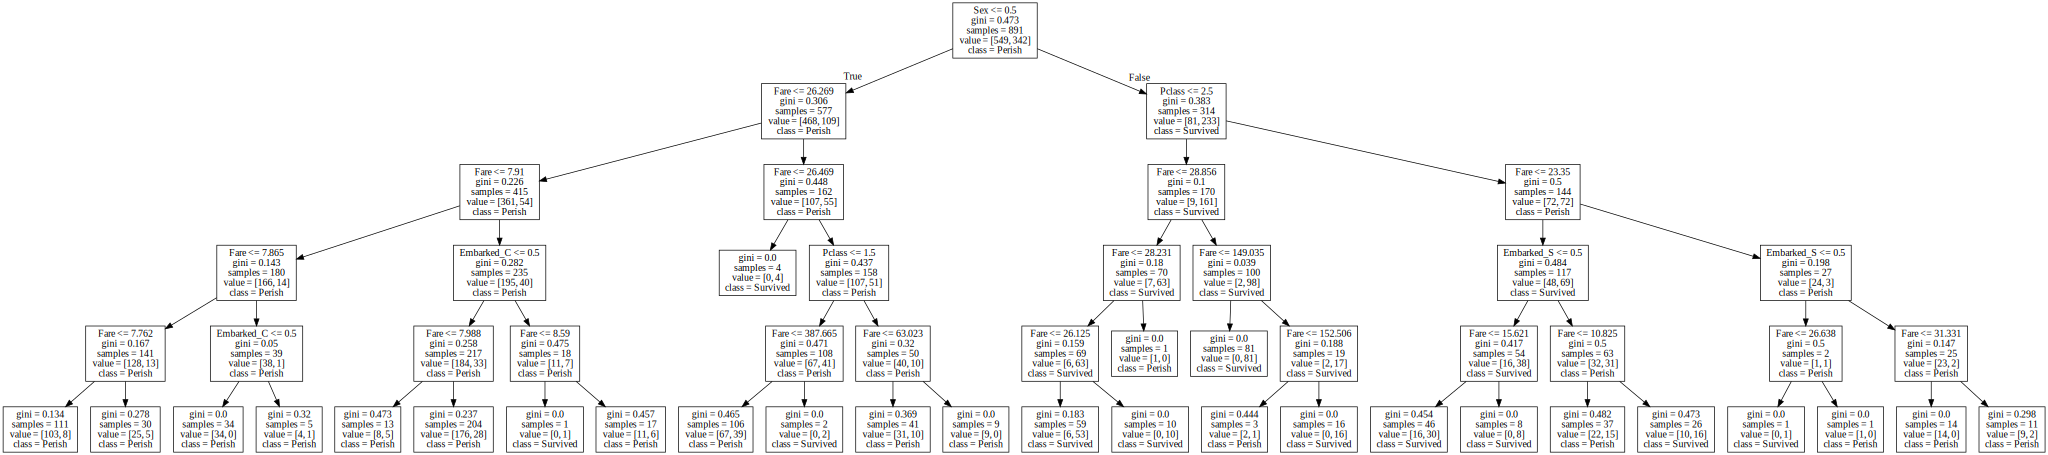

In [15]:
# 시각화를 위해서는 Graphviz라는 툴의 설치가 필요합니다. 설치 방법은 다음과 같습니다.

# 1. 아나콘다에서 설치하기(아나콘다로 파이썬을 설치한 분들은 이 방법을 이용해주세요)
#   1) 아나콘다 네비게이터(Anaconda Navigator)를 실행합니다.
#   2) 좌측 환경(Enviromments) 탭을 클릭합니다.
#   3) 우측 콤보박스에 Installed로 되어있는 것을 Not Installed로 변경합니다.
#   4) 이후 검색창에 graphviz라고 치면 graphviz와 python-graphviz라는 패키지가 보입니다.
#   5) 위의 두 패키지를 설치해주시면 됩니다.

# 2. 직접 다운받아 설치하기(아나콘다로 파이썬을 설치하지 않은 분들인 이 방법을 이용해주세요)
#   1) http://www.graphviz.org/download/ 에서 운영체제(Windows, MacOS)에 맞는 설치 파일을 다운받아주세요. (ex: graphviz-2.38.msi)
#   2) 다운받은 파일로 설치해주세요.
#   3) 쥬피터 노트북에서 !pip install graphviz 를 실행해주세요.


# from sklearn.tree import export_graphviz
# import graphviz

# export_graphviz(model,
#                 feature_names=feature_names,
#                 class_names=["Perish", "Survived"],
#                 out_file="decision-tree.dot")

# with open("decision-tree.dot") as f:
#     dot_graph = f.read()
    
# graphviz.Source(dot_graph)

In [16]:
# predict는 예측하는 함수 입니다.
# 만들어진 의사결정트리를 활용하여 테스트 데이터를 예측해서 predictions 변수에 할당합니다.
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## Submit

In [17]:
# 제출하기 위해서 제공된 gender_submission.csv 데이터를 불러옵니다.
submit = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [18]:
# submit dataframe의 Survived 컬럼을 predictions(예측한 값)으로 수정합니다.
submit["Survived"] = predictions

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [19]:
# submit dataframe을 csv파일로 저장힙니다.
submit.to_csv("data/decision-tree.csv")